In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
# import networkx as nx
from rwtools.nemesis.latency_map.create_latency_map import *
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.graph.control_flow_graph import ControlFlowGraph


In [1]:
import sys 
sys.executable

'/home/gilles/git-repos/NemesisRetroWrite/retrowrite/venv/bin/python'

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
no latency information found for instruction: jge 
no latency information found for instruction: retq 
0


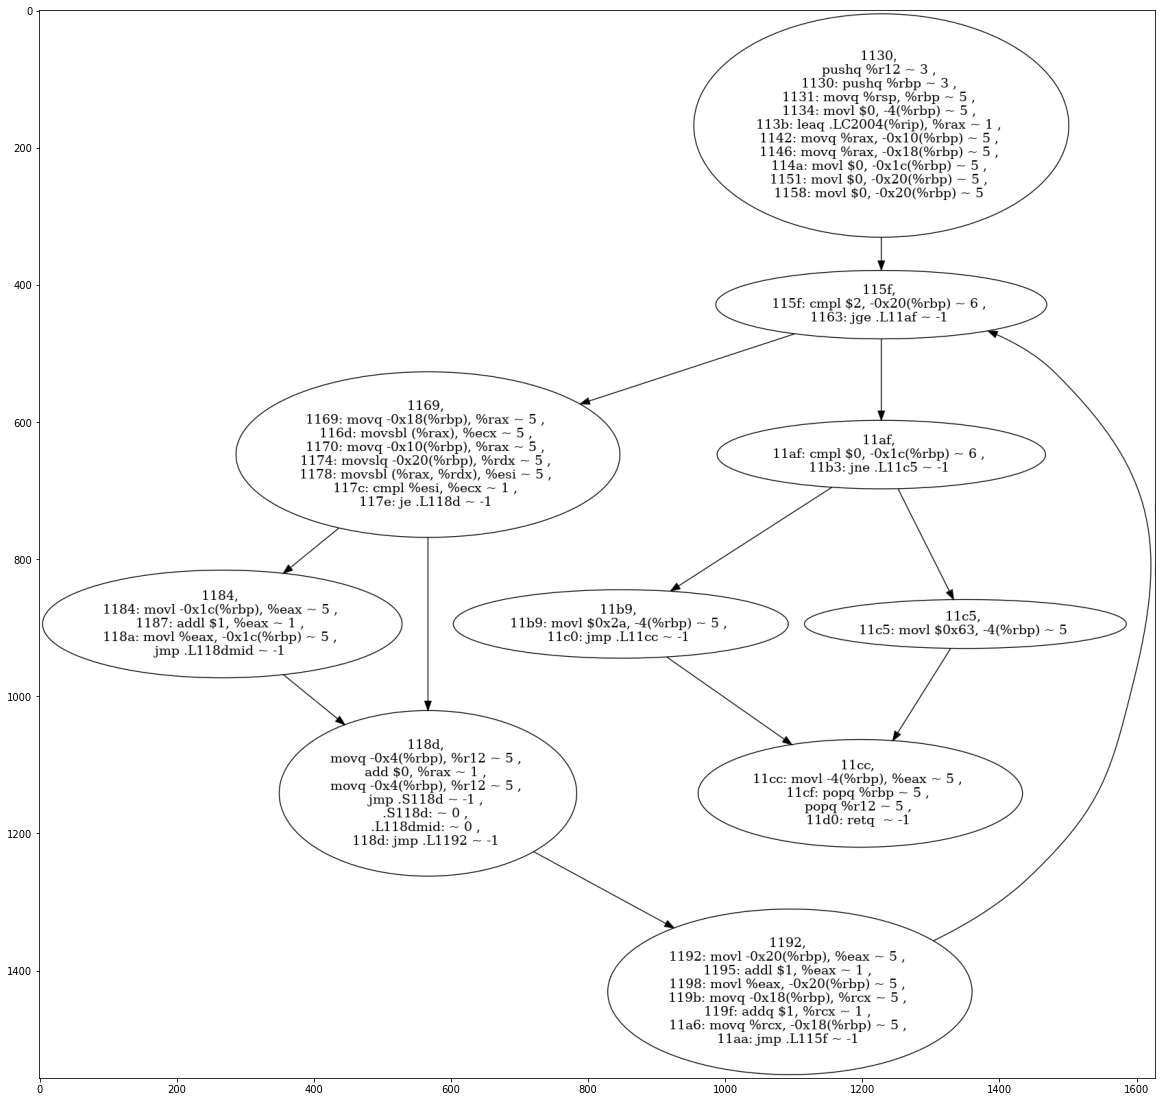

In [5]:
from rwtools.nemesis.nemesistool import NemesisInstrument
figs, axs = plt.subplots(1, figsize=(20,20))

binary = os.path.abspath("./password_comparison/password_comparison")
outputfile = "./password_comparison_rw.s"

nemesis = NemesisInstrument(binary, outputfile)

axs.imshow(nemesis.render_cfg())
# axs.imshow(nemesis.render_cfg())


target_node = nemesis.cfg.get_node('1169')


nemesis.instrument(target_node)
axs.imshow(nemesis.render_cfg())


nemesis.dump()

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
no latency information found for instruction: jle 
no latency information found for instruction: retq 


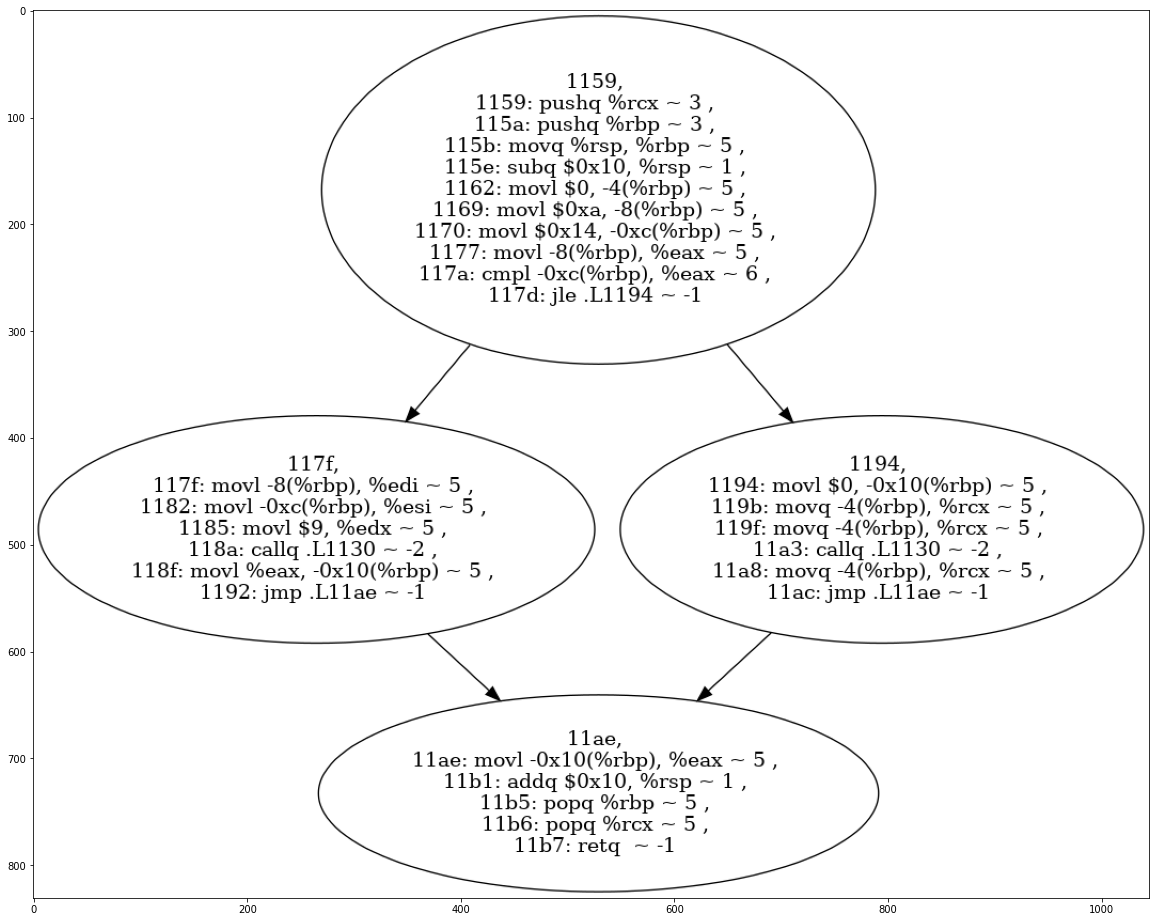

In [4]:
figs, axs = plt.subplots(1, figsize=(20,20))

binary = os.path.abspath("./a.out")
outputfile = "./password_comparison.s"

nemesis = NemesisInstrument(binary, outputfile)

axs.imshow(nemesis.render_cfg())